In [1]:
import numpy as np
import pandas as pd

In [42]:
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import Category10, Category20, Category20b, Category20c
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
file_path1=r"C:\Users\Lenovo\Documents\Project\mental_health_fitness_tracker-master\prevalence-by-mental-and-substance-use-disorder.csv"
df1=pd.read_csv(file_path1,delimiter=',', quotechar='"')
#csv file1
file_path2=r"C:\Users\Lenovo\Documents\Project\mental_health_fitness_tracker-master\mental-and-substance-use-as-share-of-disease.csv"
df2=pd.read_csv(file_path2,delimiter=',', quotechar='"')
#csv file2

In [4]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

In [5]:
df1.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                               0.44                                 
1                                               0.44                                 
2                                               0.45                                 
3                                               0.45                                 
4                                               0.45

In [6]:
df2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                                
2                                               1.79                                                
3                                               1.78                                                
4                                               1.71

In [7]:
data=pd.merge(df1,df2,on=['Entity', 'Code', 'Year'])
data.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.44                                  
1                                               0.44                                  
2                                               0.45                                  
3                                               0.45                                  
4                                               0.45                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                      

In [8]:
data.drop('Code',axis=1,inplace=True)
data.drop('Entity',axis=1,inplace=True)

data.head()

Year  \
0  1990   
1  1991   
2  1992   
3  1993   
4  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.127700                            
1                                           0.123256                            
2                                           0.118844                            
3                                           0.115089                            
4                                           0.111815                            

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.45                               
1                                               0.45                               
2                                               0.44                               
3                                               0.44                               
4                                               0.43                               

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                               0.44                                  
1                                               0.44                                  
2                                               0.45                                  
3                                               0.45                                  
4                                               0.45                                  

   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                               1.70                                                
1                                               1.73                                                
2                                               1.79                                        

In [9]:
data.size,data.shape

(61560, (6840, 9))

In [10]:
data.isnull().sum()

Year                                                                                               0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                  0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                        0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                        0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                     0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)                   0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)    0
dtype: int64

In [11]:
data=data.set_axis(axis=1, labels=['Year','Schizophrenia','Bipolar_disoder','Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'])

In [12]:
data.head()

Year  Schizophrenia  Bipolar_disoder  Eating_disorder   Anxiety  \
0  1990       0.223206         0.703023         0.127700  4.713314   
1  1991       0.222454         0.702069         0.123256  4.702100   
2  1992       0.221751         0.700792         0.118844  4.683743   
3  1993       0.220987         0.700087         0.115089  4.673549   
4  1994       0.220183         0.699898         0.111815  4.670810   

   drug_usage  depression  alcohol  mental_fitness  
0        0.45    4.996118     0.44            1.70  
1        0.45    4.989290     0.44            1.73  
2        0.44    4.981346     0.45            1.79  
3        0.44    4.976958     0.45            1.78  
4        0.43    4.977782     0.45            1.71

In [13]:
data.iloc[:,3:].apply(pd.to_numeric,errors='coerce')
data.head()

Year  Schizophrenia  Bipolar_disoder  Eating_disorder   Anxiety  \
0  1990       0.223206         0.703023         0.127700  4.713314   
1  1991       0.222454         0.702069         0.123256  4.702100   
2  1992       0.221751         0.700792         0.118844  4.683743   
3  1993       0.220987         0.700087         0.115089  4.673549   
4  1994       0.220183         0.699898         0.111815  4.670810   

   drug_usage  depression  alcohol  mental_fitness  
0        0.45    4.996118     0.44            1.70  
1        0.45    4.989290     0.44            1.73  
2        0.44    4.981346     0.45            1.79  
3        0.44    4.976958     0.45            1.78  
4        0.43    4.977782     0.45            1.71

In [14]:
data.dtypes

Year                 int64
Schizophrenia      float64
Bipolar_disoder    float64
Eating_disorder    float64
Anxiety            float64
drug_usage         float64
depression         float64
alcohol            float64
mental_fitness     float64
dtype: object

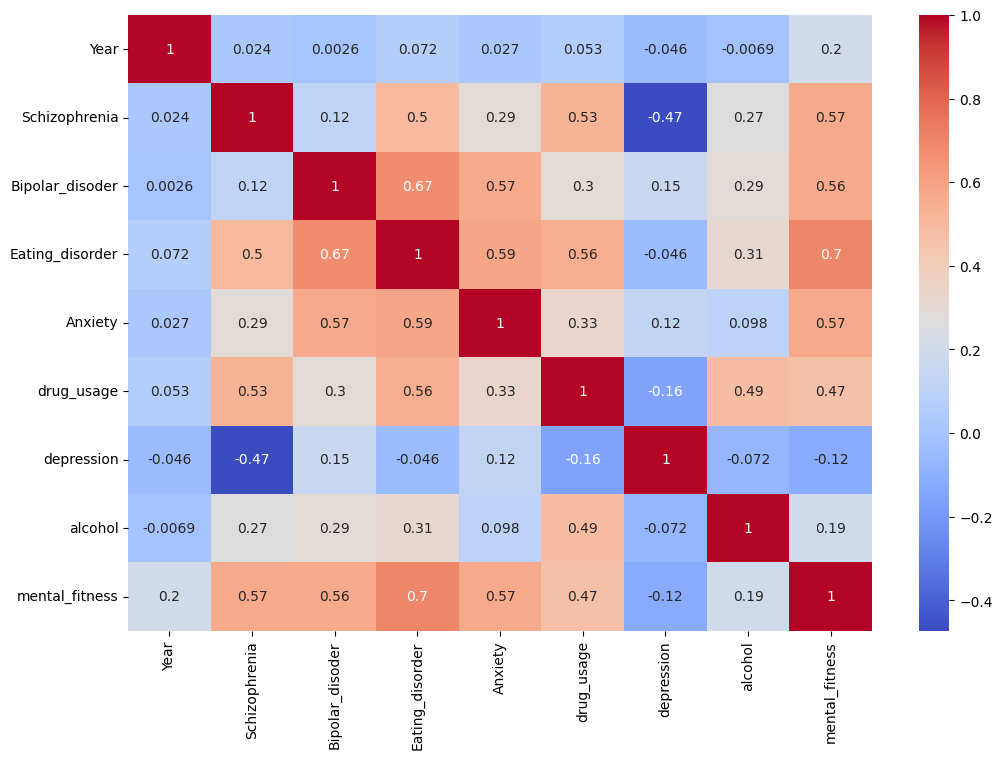

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

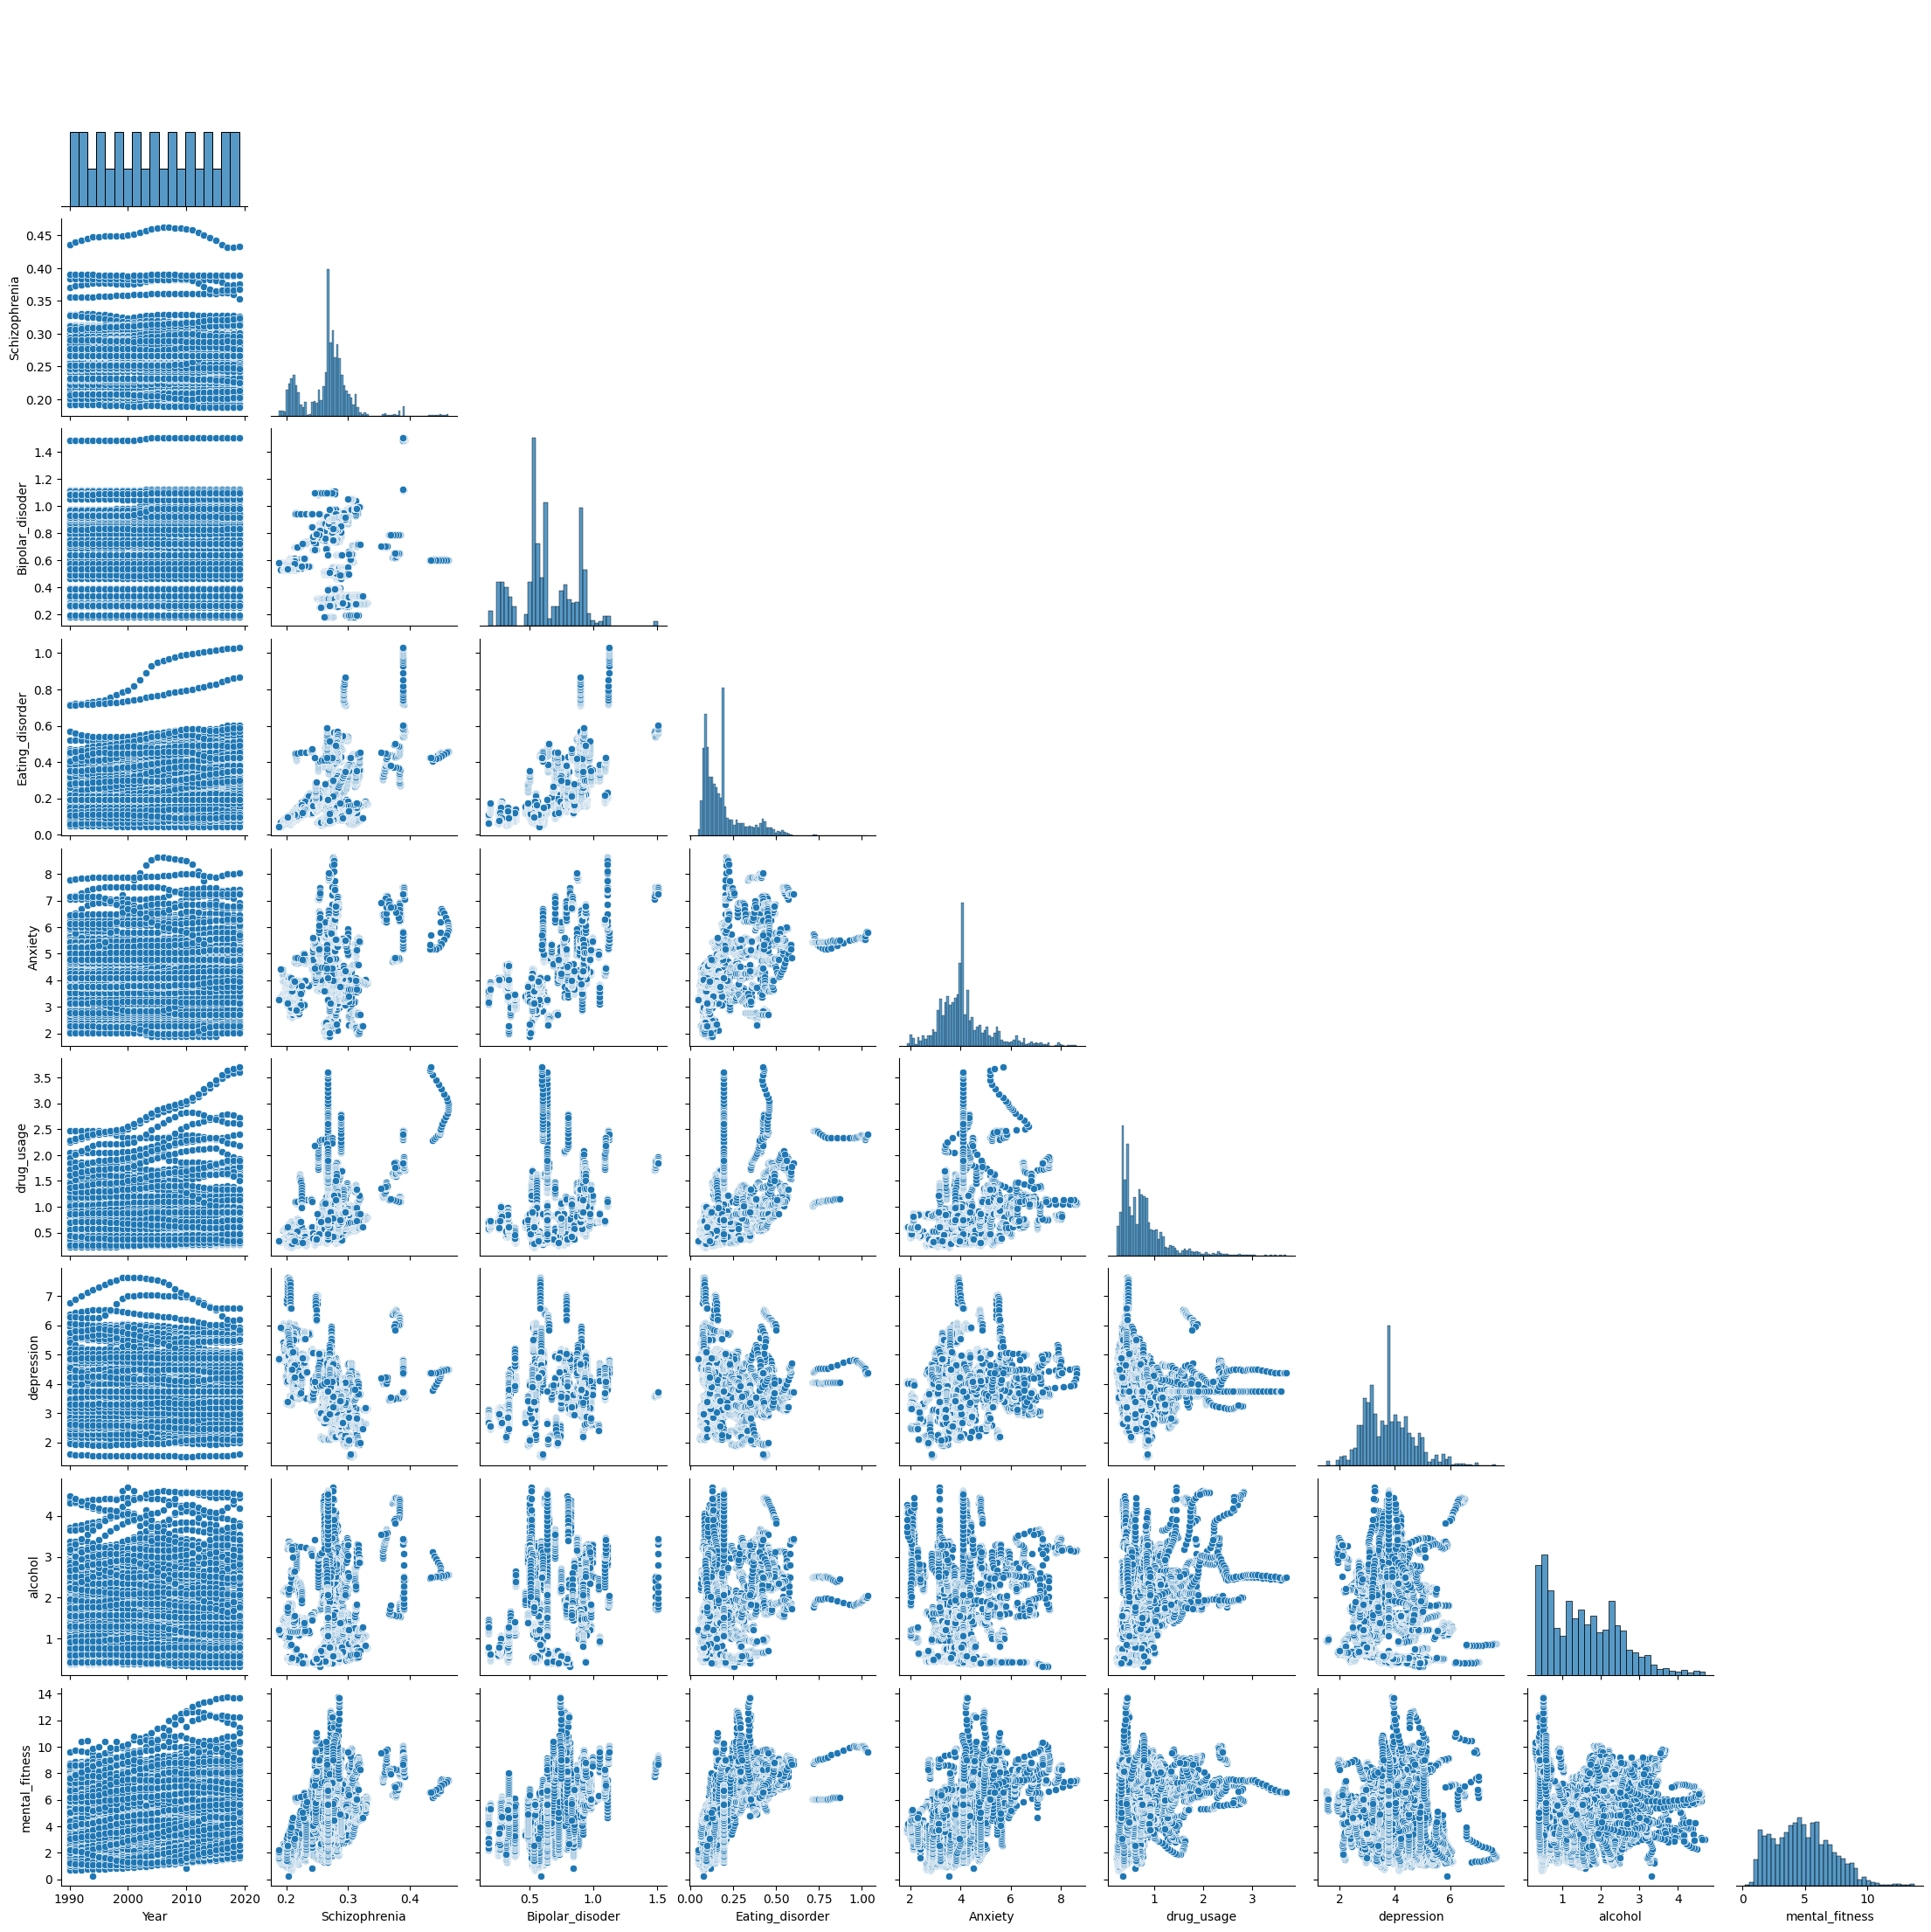

In [16]:
sns.pairplot(data,corner=True)
plt.show()

In [17]:
mean=data['mental_fitness'].mean()
mean

4.8180701754385975

In [18]:
fig=px.pie(data,values='mental_fitness',names='Year')
fig.show()

In [19]:
data.shape

(6840, 9)

In [20]:
x=data.drop('mental_fitness',axis=1)
y=data['mental_fitness']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
len(x_test)

1368

In [22]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)


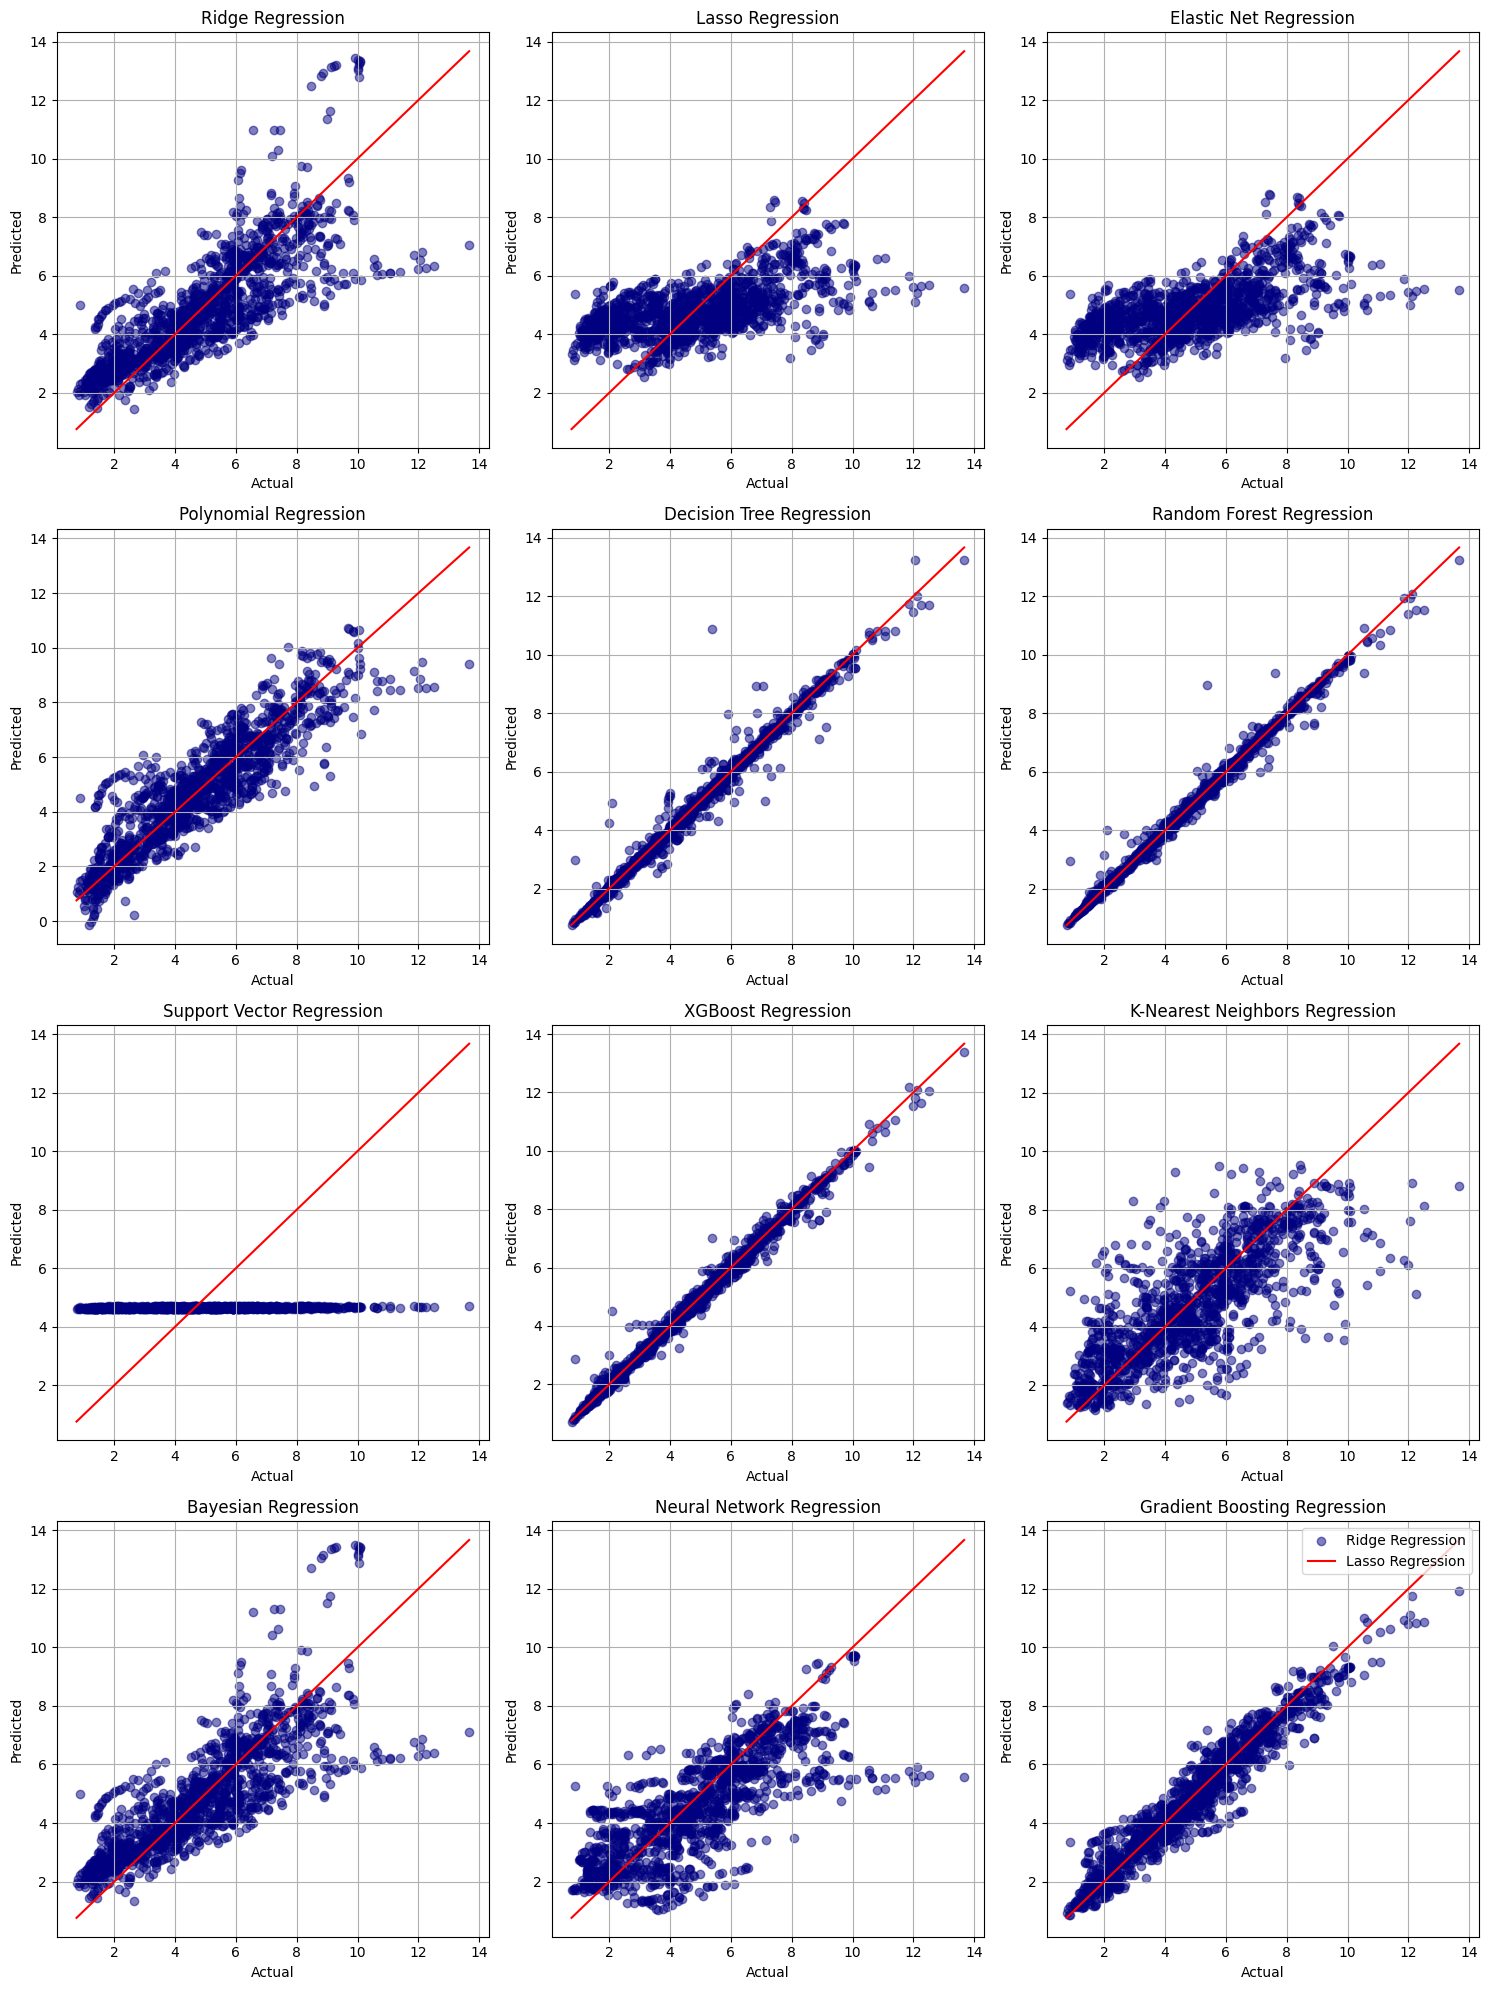

In [45]:
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train, y_train)
ridge_y_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(x_train, y_train)
lasso_y_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(x_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(x_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
x_test_poly = poly_features.transform(x_test)
poly_y_pred = poly_model.predict(x_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_y_pred = tree_model.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_y_pred = forest_model.predict(x_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(x_train, y_train)
bayesian_y_pred = bayesian_model.predict(x_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(x_train, y_train)
nn_y_pred = nn_model.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

color_palette = plt.cm.Set1(range(num_models))

for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    ax.scatter(y_actual, y_pred, color='navy', alpha=0.5, marker='o')

    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    ax.grid(True)

fig.tight_layout()

plt.legend(model_performance.keys(), loc='upper right')
plt.show()

In [39]:
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")


Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.05063448402777787
   R-squared Score: 0.9900875666551924

2. XGBoost Regression
   Mean Squared Error (MSE): 0.05409793912689923
   R-squared Score: 0.9894095451749313

3. Decision Tree Regression
   Mean Squared Error (MSE): 0.10190168128654971
   R-squared Score: 0.9800512705348667

4. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.34563628248128364
   R-squared Score: 0.9323366935118118

5. Polynomial Regression
   Mean Squared Error (MSE): 0.996863211012621
   R-squared Score: 0.804849593655727

6. Bayesian Regression
   Mean Squared Error (MSE): 1.7722933797957867
   R-squared Score: 0.653047911280544

7. Ridge Regression
   Mean Squared Error (MSE): 1.779319656544438
   R-squared Score: 0.6516724158791299

8. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 2.2151454122807017
   R-squared Score: 0.566353214219721

9. Neural Network Regression
   Mean Squared